In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

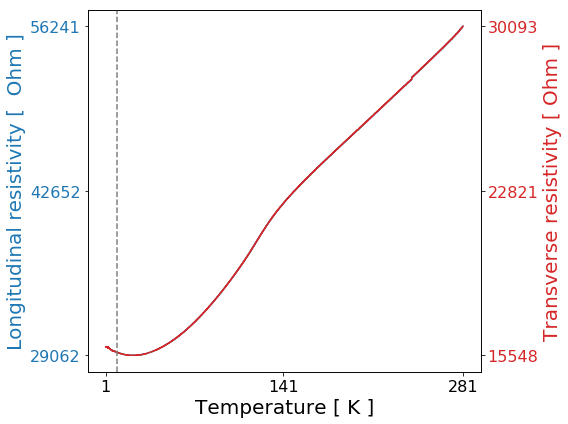

[ 24.2  24.   24.   24.   23.8  23.8  23.8  23.8  23.7  23.7  23.7  23.7
  23.5  23.5  23.5  23.5  23.3  23.3  23.3  23.3  23.3  23.3  23.1  23.1
  23.   23.   23.   23.   22.9  22.9  22.9  22.9  22.7  22.7  22.7  22.7
  22.5  22.5  22.5  22.4  22.4  22.4  22.4  22.2] [ 23.8]


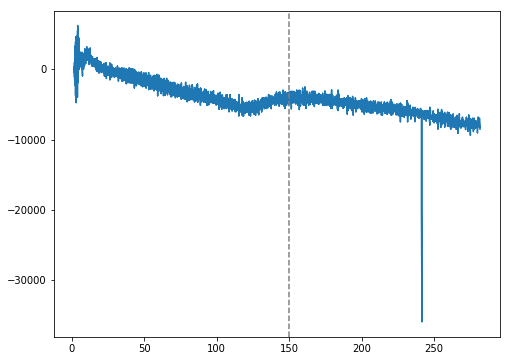

(array([ 281.8,  281.8,  281.4, ...,    1.6,    1.6,    1.6]),
 array([ 56241.24682466,  56222.66943532,  56207.88533491, ...,
         29764.47815478,  29764.47815478,  29764.47815478]),
 array([ 30093.89965838,  30085.38655219,  30077.88889134, ...,
         15924.8834122 ,  15924.8834122 ,  15924.50982745]))

In [73]:
def extract_cooldown_justone(filename,avgnumber=1,plot=False):
    data=pd.read_csv(filename,sep='\t')
    data.columns = ["time", "V_gate", "R1","Theta1","R2","Theta2","I_gate","Temp",'nan']
    T=np.array([float(i) for i in data.Temp[2:]])
    Rxx=[float(i)*10**(0) for i in data.R1[2:]]
    Rxy=[float(i)*10**(0) for i in data.R2[2:]]
    Thetaxy=[float(i) for i in data.Theta2[2:]]
    Thetaxx=[float(i) for i in data.Theta1[2:]]
    Thetaxy=[np.cos(np.deg2rad(i)) for i in Thetaxy]
    Thetaxx=[np.cos(np.deg2rad(i)) for i in Thetaxx]
    Rxy=np.array([Rxy[i]*Thetaxy[i] for i in range(len(Rxy))]) #muliplying by the phase
    Rxx=np.array([Rxx[i]*Thetaxx[i] for i in range(len(Rxx))]) #muliplying by the phase
    if plot==True: 
        #prepare plot instance
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(T,Rxx,color='tab:blue')
        ax2 = ax.twinx() # instantiate a second axes that shares the same x-axis
        ax2.plot(T,Rxy,color='tab:red')
        plt.axvline(10,linestyle='--',color='gray')

        #labels
        ax.set_ylabel('Longitudinal resistivity [  Ohm ]',color='tab:blue')
        ax.yaxis.label.set_size(20)
        ax2.set_ylabel('Transverse resistivity [ Ohm ]', color='tab:red')
        ax2.yaxis.label.set_size(20)
        ax.set_xlabel('Temperature [ K ]')
        ax.xaxis.label.set_size(20)

        #ticks
        ax.tick_params(axis='y', labelcolor='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:red')
        ax.xaxis.set_ticks([np.min(T),(np.max(T)+np.min(T))//2,np.max(T)])
        ax.xaxis.set_ticklabels([int(np.min(T)),int((np.max(T)+np.min(T))//2),int(np.max(T))],fontsize=16)
        ax.yaxis.set_ticks([np.min(Rxx),(np.max(Rxx)+np.min(Rxx))//2,np.max(Rxx)])
        ax.yaxis.set_ticklabels([int(np.min(Rxx)),int((np.max(Rxx)+np.min(Rxx))//2),int(np.max(Rxx))],fontsize=16)
        ax2.yaxis.set_ticks([np.min(Rxy),(np.max(Rxy)+np.min(Rxy))//2,np.max(Rxy)])
        ax2.yaxis.set_ticklabels([int(np.min(Rxy)),int((np.max(Rxy)+np.min(Rxy))//2),int(np.max(Rxy))],fontsize=16)

        fig.tight_layout()
        plt.show()



        #console output
        print(T[Rxx==np.min(Rxx)],T[Rxy==np.min(Rxy)])

        #finding the differences in gradient
        gradrxy=np.gradient(Rxy)*10**3
        gradrxy_begin=[sum(gradrxy[i:i+avgnumber])/(avgnumber)  for i in range(0,avgnumber) ]
        gradrxy_mid=[sum(gradrxy[i-avgnumber:i+avgnumber])/(2*avgnumber)  for i in range(avgnumber,len(gradrxy)-avgnumber)  ]
        gradrxy_end=[sum(gradrxy[i-avgnumber:i])/(avgnumber)  for i in [-avgnumber-1+j for j in range(avgnumber)] ]
        gradrxy=gradrxy_begin+gradrxy_mid+gradrxy_end
        fig,ax=plt.subplots(figsize=(8,6))
        plt.plot(T,gradrxy)
        plt.axvline(150,linestyle='--',color='gray')
        plt.show()
    return T,Rxx,Rxy
    
extract_cooldown_justone('1446_SR013_I7-3_V2p_V4p_5-4_Cooldown.txt',1,plot=True)

In [63]:
def extract_cooldown_field_and_gate(filename1,filename2,filename3,filename4,avgnumber):
    '''
    filename1: pos B, pos TG. filename2: neg B, pos TG. 
    filename 3: pos B, neg TG. filename 4: neg B, neg TG.
    '''
    T1,Rxx1,Rxy1=extract_cooldown_justone(filename1,avgnumber)
    T2,Rxx2,Rxy2=extract_cooldown_justone(filename2,avgnumber)
    T3,Rxx3,Rxy3=extract_cooldown_justone(filename3,avgnumber)
    T4,Rxx4,Rxy4=extract_cooldown_justone(filename4,avgnumber)
    
    
    
    #make sure all temps are monotonic
    itd1=[i for i in range(len(T1)-1) if (T1[i]<=T1[i+1:-1]).any()]
    itd2=[i for i in range(len(T2)-1) if (T2[i]<=T2[i+1:-1]).any()]
    itd3=[i for i in range(len(T3)-1) if (T3[i]<=T3[i+1:-1]).any()]
    itd4=[i for i in range(len(T4)-1) if (T4[i]<=T4[i+1:-1]).any()]
    
    T1=np.array(T1)
    T2=np.array(T2)
    T3=np.array(T3)
    T4=np.array(T4)
    
    T1=np.delete(T1,itd1)
    T2=np.delete(T2,itd2)
    T3=np.delete(T3,itd3)
    T4=np.delete(T4,itd4)
    
    Rxx1=np.delete(Rxx1,itd1)
    Rxx2=np.delete(Rxx2,itd2)
    Rxx3=np.delete(Rxx3,itd3)
    Rxx4=np.delete(Rxx4,itd4)
    
    Rxy1=np.delete(Rxy1,itd1)
    Rxy2=np.delete(Rxy2,itd2)
    Rxy3=np.delete(Rxy3,itd3)
    Rxy4=np.delete(Rxy4,itd4)
    
    
    hit=np.array([np.max(T1),np.max(T2),np.max(T3),np.max(T4)])
    common_hi_T=np.min(hit)
    lot=np.array([np.min(T1),np.min(T2),np.min(T3),np.min(T4)])
    common_lo_T=np.max(lot)
    
    def shorten(mat1,mat2):
        mat1,mat2=np.array(mat1),np.array(mat2)
        [inds]=np.where((mat2>=common_lo_T) & (mat2<=common_hi_T))
        return mat1[inds]
    
    T1=shorten(T1,T1)
    T2=shorten(T2,T2)
    T3=shorten(T3,T3)
    T4=shorten(T4,T4)
    Rxx1=shorten(Rxx1,T1)
    Rxx2=shorten(Rxx2,T2)
    Rxx3=shorten(Rxx3,T3)
    Rxx4=shorten(Rxx4,T4)
    Rxy1=shorten(Rxy1,T1)
    Rxy2=shorten(Rxy2,T2)
    Rxy3=shorten(Rxy3,T3)
    Rxy4=shorten(Rxy4,T4)
    
    templen=np.array([len(T1),len(T2),len(T3),len(T4)])
    [big]=np.where(templen==np.max(templen))
    big=big[0]
    
    print(np.array([len(T1),len(T2),len(T3),len(T4)]))
    
    tarr=np.array([T1,T2,T3,T4])
    rxxarr=np.array([Rxx1,Rxx2,Rxx3,Rxx4])
    rxyarr=np.array([Rxy1,Rxy2,Rxy3,Rxy4])
    
    ib=tarr[big]
    
    print(T1[-10:],T2[-10:],T3[-10:],T4[-10:])
    
    def interp(num,sign):
        if sign=='xx':
                return np.flip(np.interp(np.flip(ib,0),np.flip(tarr[num],0),np.flip(rxxarr[num],0)),0)
        elif sign=='xy':
                return np.flip(np.interp(np.flip(ib,0),np.flip(tarr[num],0),np.flip(rxyarr[num],0)),0)

    Rxx1=interp(0,'xx')
    Rxx2=interp(1,'xx')
    Rxx3=interp(2,'xx')
    Rxx4=interp(3,'xx')
    Rxy1=interp(0,'xy')
    Rxy2=interp(1,'xy')
    Rxy3=interp(2,'xy')
    Rxy4=interp(3,'xy')
    
    Rxy_pos=0.5*(Rxy1-Rxy2)
    Rxy_neg=0.5*(Rxy3-Rxy4)
    
    
    #prepare plot instance
    fig, ax = plt.subplots(figsize=(8,6))
    

    ax.plot(ib,Rxy1,label='+15 V, +50 mT')
    ax.plot(ib,Rxy2,label='+15 V, -50 mT')
    ax.plot(ib,Rxy3,label='-15 V, +50 mT')
    ax.plot(ib,Rxy4,label='-15 V, -50 mT')
    
#     ax.plot(ib,Rxy_pos,color='tab:green',label='+15 V')
#     ax.plot(ib,Rxy_neg,color='tab:purple',label='-15 V')
    
    #labels
    ax.set_ylabel('Rxy [ Ohm ]')#,color='tab:blue')
    ax.yaxis.label.set_size(20)
    ax.set_xlabel('Temperature [ K ]')
    ax.xaxis.label.set_size(20)
    
    #ticks
    ax.tick_params(axis='y')#, labelcolor='tab:blue')
    ax.xaxis.set_ticks([0,(np.max(tarr[big])+np.min(tarr[big]))//2,np.max(tarr[big])])
    ax.xaxis.set_ticklabels([0,int((np.max(tarr[big])+np.min(tarr[big]))//2),int(np.max(tarr[big]))],fontsize=16)
    
    ax.yaxis.set_ticks([180,140,100])
    ax.yaxis.set_ticklabels([180,140,100],fontsize=16)
    
    ax.legend(prop={'size': 15},loc='upper left')
    fig.tight_layout()
    plt.show()
    
    
    
#     #console output
#     print(T[Rxx==np.min(Rxx)],T[Rxy==np.min(Rxy)])
    
#     #finding the differences in gradient
#     gradrxy=np.gradient(Rxy)*10**3
#     gradrxy_begin=[sum(gradrxy[i:i+avgnumber])/(avgnumber)  for i in range(0,avgnumber) ]
#     gradrxy_mid=[sum(gradrxy[i-avgnumber:i+avgnumber])/(2*avgnumber)  for i in range(avgnumber,len(gradrxy)-avgnumber)  ]
#     gradrxy_end=[sum(gradrxy[i-avgnumber:i])/(avgnumber)  for i in [-avgnumber-1+j for j in range(avgnumber)] ]
#     gradrxy=gradrxy_begin+gradrxy_mid+gradrxy_end
#     fig,ax=plt.subplots(figsize=(8,6))
#     plt.plot(T,gradrxy)
#     plt.axvline(150,linestyle='--',color='gray')
#     plt.show()


[1814 1512 1781  987]
[ 3.6  3.5  3.4  3.3  3.2  3.1  3.   2.9  2.8  2.7] [ 3.9  3.8  3.7  3.5  3.4  3.3  3.1  3.   2.9  2.8] [ 3.7  3.6  3.5  3.4  3.3  3.   2.9  2.8  2.7  2.7] [ 3.6  3.5  3.4  3.3  3.2  3.1  3.   2.9  2.8  2.7]


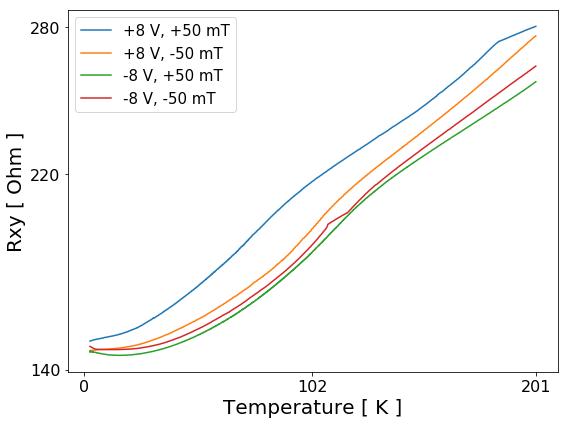

In [52]:
extract_cooldown_field_and_gate('1155_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall4-9_50mT_7.92V_cooldown.txt','1603_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall4-9_-50mT_8V_fieldcooldown.txt','1034_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall4-9_50mT_-8V_cooldown.txt','1430_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall4-9_-50mT_-8V_cooldown.txt',1)

[542 690 542 534]
[ 2.5  2.4  2.3  2.2  2.1  2.   1.9  1.8  1.7  1.6] [ 2.5  2.4  2.3  2.2  2.1  2.   1.9  1.8  1.7  1.6] [ 2.5  2.4  2.3  2.2  2.1  2.   1.9  1.8  1.7  1.6] [ 2.4  2.3  2.2  2.1  2.   1.9  1.8  1.7  1.6  1.6]


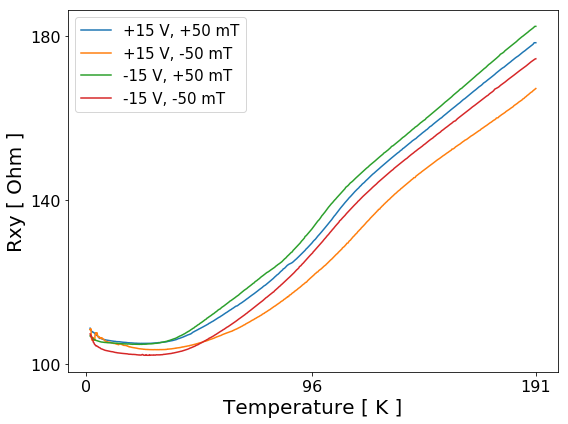

In [64]:
extract_cooldown_field_and_gate('0929_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall5-8_cooldown_50mT_+15V.txt','1808_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall5-8_cooldown_-50mT_+15V.txt','1317_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall5-8_cooldown_+50mT_-15V.txt','1432_SR013_MR_Hall_Dev2_I7-3_V5-4_VHall5-8_cooldown_-50mT_-15V.txt',1)

In [9]:
def extract_cooldown_field(filename1,filename2,avgnumber=1):
    '''
    filename1: pos B. filename2: neg B. 
    '''
    T1,Rxx1,Rxy1=extract_cooldown_justone(filename1,avgnumber)
    T2,Rxx2,Rxy2=extract_cooldown_justone(filename2,avgnumber)
    
    
    
    #make sure all temps are monotonic
    itd1=[i for i in range(len(T1)-1) if (T1[i]<=T1[i+1:-1]).any()]
    itd2=[i for i in range(len(T2)-1) if (T2[i]<=T2[i+1:-1]).any()]
    
    T1=np.array(T1)
    T2=np.array(T2)
    
    T1=np.delete(T1,itd1)
    T2=np.delete(T2,itd2)
    
    Rxx1=np.delete(Rxx1,itd1)
    Rxx2=np.delete(Rxx2,itd2)
    
    Rxy1=np.delete(Rxy1,itd1)
    Rxy2=np.delete(Rxy2,itd2)
    
    
    hit=np.array([np.max(T1),np.max(T2)])
    common_hi_T=np.min(hit)
    lot=np.array([np.min(T1),np.min(T2)])
    common_lo_T=30 #np.max(lot)
    
    def shorten(mat1,mat2):
        mat1,mat2=np.array(mat1),np.array(mat2)
        [inds]=np.where((mat2>=common_lo_T) & (mat2<=common_hi_T))
        return mat1[inds]
    
    T1=shorten(T1,T1)
    T2=shorten(T2,T2)
    Rxx1=shorten(Rxx1,T1)
    Rxx2=shorten(Rxx2,T2)
    Rxy1=shorten(Rxy1,T1)
    Rxy2=shorten(Rxy2,T2)
    
    templen=np.array([len(T1),len(T2)])
    [big]=np.where(templen==np.max(templen))
    big=big[0]
    
    print(np.array([len(T1),len(T2)]))
    
    tarr=np.array([T1,T2])
    rxxarr=np.array([Rxx1,Rxx2])
    rxyarr=np.array([Rxy1,Rxy2])
    
    ib=tarr[big]
    
    
    def interp(num,sign):
        if sign=='xx':
                return np.flip(np.interp(np.flip(ib,0),np.flip(tarr[num],0),np.flip(rxxarr[num],0)),0)
        elif sign=='xy':
                return np.flip(np.interp(np.flip(ib,0),np.flip(tarr[num],0),np.flip(rxyarr[num],0)),0)

    Rxx1=interp(0,'xx')
    Rxx2=interp(1,'xx')
    Rxy1=interp(0,'xy')
    Rxy2=interp(1,'xy')
    
    Rxy_subtract=0.5*(Rxy1-Rxy2)
    
    
    #prepare plot instance
    fig, ax = plt.subplots(figsize=(8,6))
    

    ax.plot(ib,Rxy1,label='+50 mT')
    ax.plot(ib,Rxy2,label='-50 mT')
    
    ax.plot(ib,Rxy_subtract,color='tab:green',label='Subtracted')
    #plt.axvline(70,linestyle='--',color='gray')
    
    #labels
    ax.set_ylabel('Rxy [ Ohm ]')#,color='tab:blue')
    ax.yaxis.label.set_size(20)
    ax.set_xlabel('Temperature [ K ]')
    ax.xaxis.label.set_size(20)
    
    #ticks
    ax.tick_params(axis='y')#, labelcolor='tab:blue')
    ax.xaxis.set_ticks([30,(np.max(tarr[big])+np.min(tarr[big]))//2,np.max(tarr[big])])
    ax.xaxis.set_ticklabels([30,int((np.max(tarr[big])+np.min(tarr[big]))//2),int(np.max(tarr[big]))],fontsize=16)
    #ax.yaxis.set_ticks([np.min(Rxy_pos),(np.max(Rxy_pos)+np.min(Rxy_pos))//2,np.max(Rxy_pos)])
    #ax.yaxis.set_ticklabels([int(np.min(Rxy1)),int((np.max(Rxy1)+np.min(Rxy1))//2),int(np.max(Rxy1))],fontsize=16)
    ax.legend(prop={'size': 15},loc='upper right')
    fig.tight_layout()
    plt.show()
    
    
    
#     #console output
#     print(T[Rxx==np.min(Rxx)],T[Rxy==np.min(Rxy)])
    
#     #finding the differences in gradient
#     gradrxy=np.gradient(Rxy)*10**3
#     gradrxy_begin=[sum(gradrxy[i:i+avgnumber])/(avgnumber)  for i in range(0,avgnumber) ]
#     gradrxy_mid=[sum(gradrxy[i-avgnumber:i+avgnumber])/(2*avgnumber)  for i in range(avgnumber,len(gradrxy)-avgnumber)  ]
#     gradrxy_end=[sum(gradrxy[i-avgnumber:i])/(avgnumber)  for i in [-avgnumber-1+j for j in range(avgnumber)] ]
#     gradrxy=gradrxy_begin+gradrxy_mid+gradrxy_end
#     fig,ax=plt.subplots(figsize=(8,6))
#     plt.plot(T,gradrxy)
#     plt.axvline(150,linestyle='--',color='gray')
#     plt.show()


[777 703]


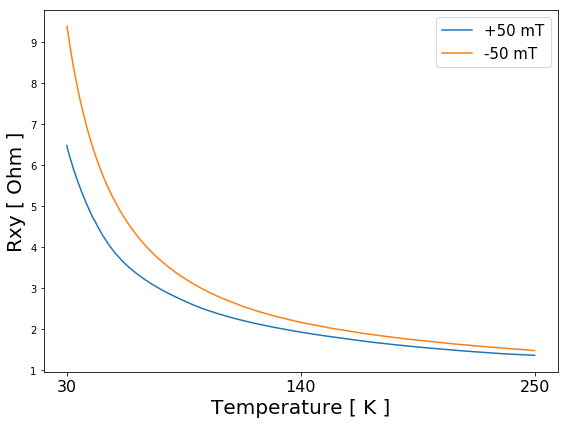

In [6]:
extract_cooldown_field('1700_SR032_MR_Hall_I6-3_V5-4_VHall5-7_cooldown50mT.txt','1410_SR032_MR_Hall_I6-3_V5-4_VHall5-7_cooldown-50mT.txt',1)

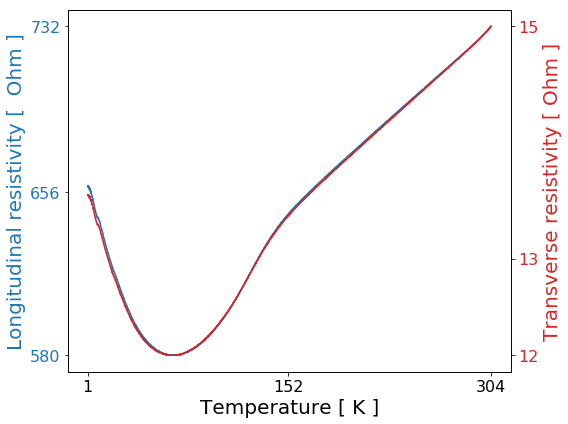

[ 64.4] [ 66.4  66.1  65.7  65.7  65.7  65.5  65.2  65.   65.   64.6  64.4  64.4
  64.4  64.   64.   63.8  63.6  63.6  62.5]


(array([ 304.3,  304.3,  303.7, ...,    1.5,    1.5,    1.5]),
 array([ 732.39169809,  732.25220104,  732.11270399, ...,  658.69518774,
         658.6648721 ,  658.69518774]),
 array([ 15.28044298,  15.27673088,  15.27673088, ...,  13.62428225,
         13.62516145,  13.62516145]))

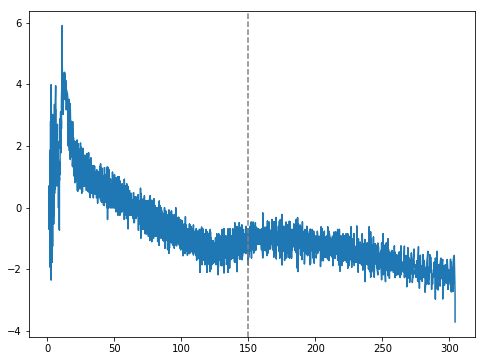

In [7]:
extract_cooldown_justone('1732_FM15b_RT_Cooldown_I15-9_V14-10_V4p_V2p.txt',avgnumber=1,plot=True)

[1102 2246]


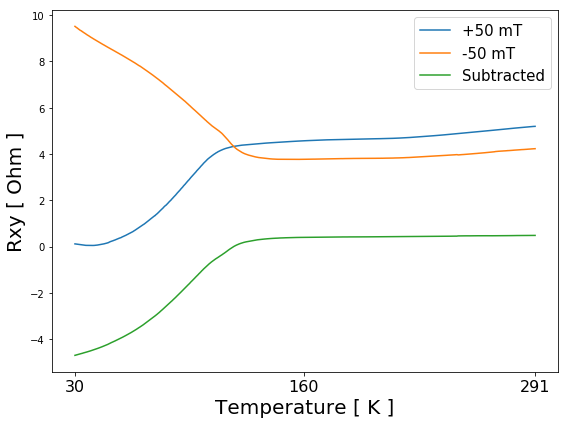

In [13]:
extract_cooldown_field('1706_SI2234_FieldCooling50mT_Hall_MR_I11-15_V9-8_V14-16_10uA.txt','1830_SI2234_FieldCooling-50mT_Hall_MR_I11-15_V9-8_V14-16_10uA.txt')

[ 577 1287]


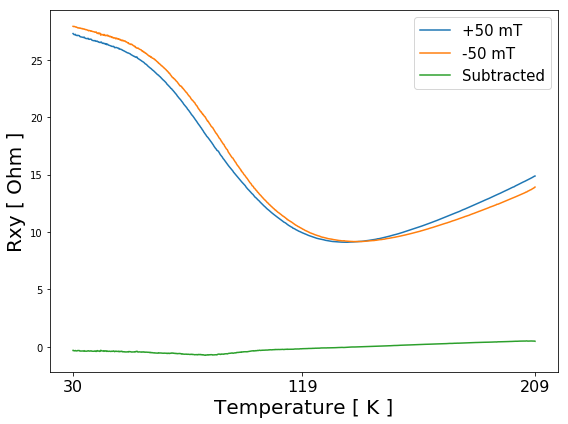

In [15]:
extract_cooldown_field('1828_SR001_fieldcooling_I1-5_V3-4_V15-2_FieldCooling_50mT.txt','1527_SR001_fieldcooling_I1-5_V3-4_V15-2_FieldCooling_-50mT.txt')